## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [169]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt

In [108]:
# Load the dataset
file_path = 'cleaned_ecommerce_dataset.csv'
data = pd.read_csv(file_path)
data

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


In [109]:
#total length
total_length = len(data)
total_length

2685

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [110]:
data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [112]:
# Convert categorical features 
encoder = OrdinalEncoder()
data['gender_encoded'] = encoder.fit_transform(data[['gender']])
data[["gender", "gender_encoded"]].head()

,gender,gender_encoded
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0


In [113]:
data['category_encoded'] = encoder.fit_transform(data[['category']])
data[["category", "category_encoded"]].head()

,category,category_encoded
0,Restaurants & Gourmet,8.0
1,Restaurants & Gourmet,8.0
2,Restaurants & Gourmet,8.0
3,Movies,5.0
4,Movies,5.0


In [114]:
data['review_encoded'] = encoder.fit_transform(data[['review']])
data[["review", "review_encoded"]].head()

,review,review_encoded
0,Not always McCrap,1618.0
1,I dropped the chalupa even before he told me to,1125.0
2,The Wonderful World of Wendy,2185.0
3,They actually did it,2243.0
4,Hey! Gimme some pie!,1033.0


In [115]:
#the correlations between helpfulness/gender/category/review and rating
correlations = data[['helpfulness', 'gender_encoded', 'category_encoded', 'review_encoded', 'rating']].corr()
correlations

,helpfulness,gender_encoded,category_encoded,review_encoded,rating
helpfulness,1.000000,0.075947,-0.013408,-0.028259,-0.007523
gender_encoded,0.075947,1.000000,0.022549,-0.037884,-0.034337
category_encoded,-0.013408,0.022549,1.000000,0.001970,-0.163158
review_encoded,-0.028259,-0.037884,0.001970,1.000000,-0.036118
rating,-0.007523,-0.034337,-0.163158,-0.036118,1.000000


In [116]:
# Identify the most correlated features with rating
max_corr_feature = correlations['rating'].idxmax()
correlations['rating'][max_corr_feature]

1.0

In [117]:
# Identify the least correlated features with rating
min_corr_feature = correlations['rating'].idxmin()
correlations['rating'][min_corr_feature]

-0.16315765340915675

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [129]:
#Case 1: training data containing 10% of the entire data
train_case1, test_case1 = train_test_split(data, test_size=0.1, random_state=142)
print(train_case1.shape)
print(test_case1.shape)

(2416, 14)
(269, 14)


In [135]:
X_train_case1 = train_case1[['helpfulness', 'gender_encoded', 'category_encoded', 'review_encoded']]
y_train_case1 = train_case1['rating']

X_test_case1 = test_case1[['helpfulness', 'gender_encoded', 'category_encoded', 'review_encoded']]
y_test_case1 = test_case1['rating']

In [131]:
model = linear_model.LinearRegression()
model.fit(X_train_case1, y_train_case1)

LinearRegression()

In [132]:
#Case 2: training data containing 90% of the entire data
train_case2, test_case2 = train_test_split(data, test_size=0.9, random_state=142)
print(train_case2.shape)
print(test_case2.shape)

(268, 14)
(2417, 14)


In [133]:
X_train_case2 = train_case2[['helpfulness', 'gender_encoded', 'category_encoded', 'review_encoded']]
y_train_case2 = train_case2['rating']

X_test_case2 = test_case2[['helpfulness', 'gender_encoded', 'category_encoded', 'review_encoded']]
y_test_case2 = test_case2['rating']

In [123]:
model = linear_model.LinearRegression()
model.fit(X_train_case2, y_train_case2)

LinearRegression()

### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [137]:
# Select two most correlated and two least correlated features regarding rating
most_correlated_features = ['helpfulness', 'review_encoded']  
least_correlated_features = ['gender_encoded', 'category_encoded']


In [139]:
#(model-a) the training/testing data in case 1 
X_train_caseA = train_case1[['helpfulness','review_encoded']]
y_train_caseA = train_case1['rating']

X_test_caseA = test_case1[['helpfulness', 'review_encoded']]
y_test_caseA = test_case1['rating']

In [142]:
#(model-B) the training/testing data in case 1 
X_train_caseB = train_case1[['gender_encoded', 'category_encoded']]
y_train_caseB = train_case1['rating']

X_test_caseB = test_case1[['gender_encoded', 'category_encoded']]
y_test_caseB = test_case1['rating']

In [146]:
#(model-c) the training/testing data in case 2
X_train_caseC = train_case2[['helpfulness','review_encoded']]
y_train_caseC = train_case2['rating']

X_test_caseC = test_case2[['helpfulness', 'review_encoded']]
y_test_caseC = test_case2['rating']

In [147]:
#(model-d) the training/testing data in case 2
X_train_caseD = train_case2[['gender_encoded', 'category_encoded']]
y_train_caseD = train_case2['rating']

X_test_caseD = test_case2[['gender_encoded', 'category_encoded']]
y_test_caseD = test_case2['rating']

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [ ]:
#the performance of the four models
#model a

In [154]:
reg_modelA = linear_model.LinearRegression()

reg_modelA.fit(X_train_caseA, y_train_caseA)

LinearRegression()

In [174]:
predicted_modelA = reg_modelA.predict(X_train_caseA)
mse_A = mean_squared_error(y_train_caseA, predicted_modelA)
r2_A = r2_score(y_train_caseA, predicted_modelA)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1.7599656045684442
R Squared: 0.029170590871491653


In [175]:
predicted_modelA = reg_modelA.predict(X_test_caseA)
mse_A = mean_squared_error(y_test_caseA, predicted_modelA)
r2_A = r2_score(y_test_caseA, predicted_modelA)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1.7599656045684442
R Squared: 0.029170590871491653


In [176]:
#model b

In [177]:
reg_modelB = linear_model.LinearRegression()

reg_modelB.fit(X_train_caseB, y_train_caseB)

LinearRegression()

In [178]:
predicted_modelB = reg_modelB.predict(X_train_caseB)
mse_B = mean_squared_error(y_train_caseA, predicted_modelB)
r2_B = r2_score(y_train_caseB, predicted_modelB)
print("MSE:", mse)
print("R Squared:", r2)

MSE: 1.7599656045684442
R Squared: 0.029170590871491653


In [179]:
predicted_modelB = reg_modelB.predict(X_test_caseB)
mse_B = mean_squared_error(y_test_caseB, predicted_modelB)
r2_B = r2_score(y_test_caseB, predicted_modelB)
print("MSE B:", mse_B)
print("R Squared B:", r2_B)

MSE B: 1.7796603830998545
R Squared B: 0.010496027619493975


In [180]:
#model c

In [181]:
reg_modelC = linear_model.LinearRegression()
reg_modelC.fit(X_train_caseC, y_train_caseC)

LinearRegression()

In [182]:
predicted_modelC = reg_modelC.predict(X_train_caseC)
mse_C = mean_squared_error(y_train_caseC, predicted_modelC)
r2_C = r2_score(y_train_caseC, predicted_modelC)
print("Model C - MSE:", mse_C)
print("Model C - R Squared:", r2_C)

Model C - MSE: 1.8265654732919125
Model C - R Squared: 0.01722783892758073


In [183]:
predicted_modelC = reg_modelC.predict(X_test_caseC)
mse_C = mean_squared_error(y_test_caseC, predicted_modelC)
r2_C = r2_score(y_test_caseC, predicted_modelC)
print("MSE C:", mse_C)
print("R Squared C:", r2_C)

MSE C: 1.83964890692985
R Squared C: -0.018494605815490894


In [184]:
#model d

In [185]:
reg_modelD = linear_model.LinearRegression()
reg_modelD.fit(X_train_caseD, y_train_caseD)

LinearRegression()

In [186]:
predicted_modelD = reg_modelD.predict(X_train_caseD)
mse_D = mean_squared_error(y_train_caseD, predicted_modelD)
r2_D = r2_score(y_train_caseD, predicted_modelD)
print("Model D - MSE:", mse_D)
print("Model D - R Squared:", r2_D)

Model D - MSE: 1.7698028457612902
Model D - R Squared: 0.04776861665611232


In [187]:
predicted_modelD = reg_modelD.predict(X_test_caseD)
mse_D = mean_squared_error(y_test_caseD, predicted_modelD)
r2_D = r2_score(y_test_caseD, predicted_modelD)
print("MSE D:", mse_D)
print("R Squared D:", r2_D)

MSE D: 1.7723033271831938
R Squared D: 0.018790285578246135


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [188]:
model_names = ['Model A', 'Model B', 'Model C', 'Model D']
mse_train = [mse_A, mse_B, mse_C, mse_D]
r2_train = [r2_A, r2_B, r2_C, r2_D]

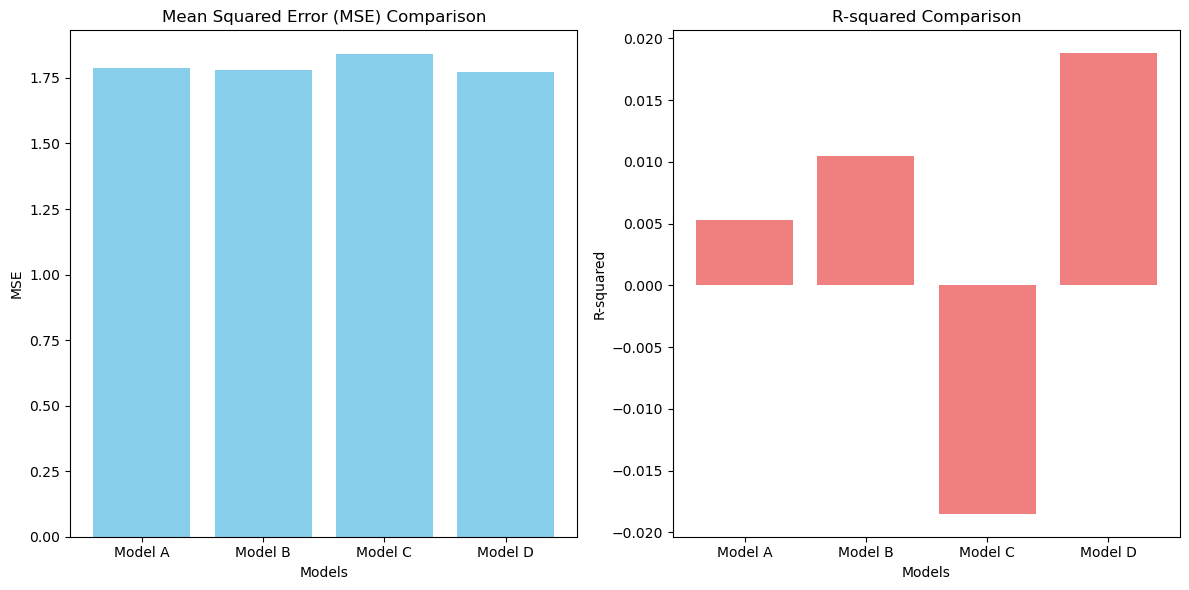

In [190]:
plt.figure(figsize=(12, 6))

# Subplot for MSE
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_train, color='skyblue')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE) Comparison')

# Subplot for R-squared
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_train, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The choice of features and how they are engineered can greatly impact model performance. It's possible that the most correlated features are not the most informative ones for this particular dataset.